## Neo4j_Run
*
### 代码运行环境
* 如果会 python, jupyter 的可以略过这一部分, 直接去 Introduction
* 去 https://colab.research.google.com/
* 点 左上角 File, new notebook 或者直接 upload 这个文件 (Neo4j_Run)
* 新建的话, 就开俩代码块, 依次复制粘贴 1 和 2, 再依次运行 1 和 2, 应该就 ok 了
* 连接的上的话, 跑了之后最下面会显示 100 行数据

---

### Introduction
1. 按顺序依次跑 Basics 1, 2 两条
2. 懒得管别的的话, 注意一下打⭐️五角星⭐️的地方就行, 别的都不用管
3. 不要运行 (改动, 删除) 有关的命令, 因为, 这个数据库是 7 个人共享的
   1. 在 query️ ⭐️的地方换成你的 read query 就行
4. Basics 是连上Neo4j, Section 2 和 3 是展示 visualize
    1. section2/3 太丑的话, 来找我, 我去终端 网页上 visualize 更好
        1. 但我 account 是 google account, 不太方便 share hh

---


### Section 1 - Basics
* 这里的代码显示结果不好看, Section 2 和 3 就是 让结果更像 graph

1. install Python Packages

In [1]:
pip install neo4j

Note: you may need to restart the kernel to use updated packages.


2. Connect + Run query



In [2]:
from neo4j import GraphDatabase

# Neo4j 数据库信息
NEO4J_URI = ""
NEO4J_USERNAME = ""
NEO4J_PASSWORD = ""

# 创建 Neo4j 驱动
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))
# 验证连接
with driver.session() as session:
    session.run("RETURN 1")
    print("连接成功！")

# 用来跑 query 的 function
def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return [record.data() for record in result]

# ⭐查询数据, 引号""里面换成你的 query ⭐
all_nodes = run_query("MATCH (n) RETURN n")
print(all_nodes)

# # 查询所有关系
# all_relationships = run_query("MATCH ()-[r]->() RETURN r")
# print(all_relationships)

连接成功！
[{'n': {'country': 'Tokelau', 'airport_id': 22, 'city': 'North Kennethburgh', 'latitude': -5.54031, 'name': 'Carolinemouth International Airport', 'longitude': 10.047}}, {'n': {'country': 'Hong Kong', 'airport_id': 23, 'city': 'Schultzborough', 'latitude': 23.6514, 'name': 'Matthewbury International Airport', 'longitude': 9.17493}}, {'n': {'country': 'Puerto Rico', 'airport_id': 24, 'city': 'Kimborough', 'latitude': 46.381, 'name': 'Melissabury International Airport', 'longitude': 5.28579}}, {'n': {'country': 'Korea', 'airport_id': 25, 'city': 'Hallville', 'latitude': -54.4381, 'name': 'Fisherview International Airport', 'longitude': -146.221}}, {'n': {'country': 'Hong Kong', 'airport_id': 26, 'city': 'West Jamesville', 'latitude': -52.7001, 'name': 'Stevenside International Airport', 'longitude': -157.608}}, {'n': {'country': 'Moldova', 'airport_id': 27, 'city': 'East Kara', 'latitude': -72.7564, 'name': 'Kevinberg International Airport', 'longitude': 6.1551}}, {'n': {'country':

---
### Section 2 - Display 1


In [ ]:
pip install networkx matplotlib

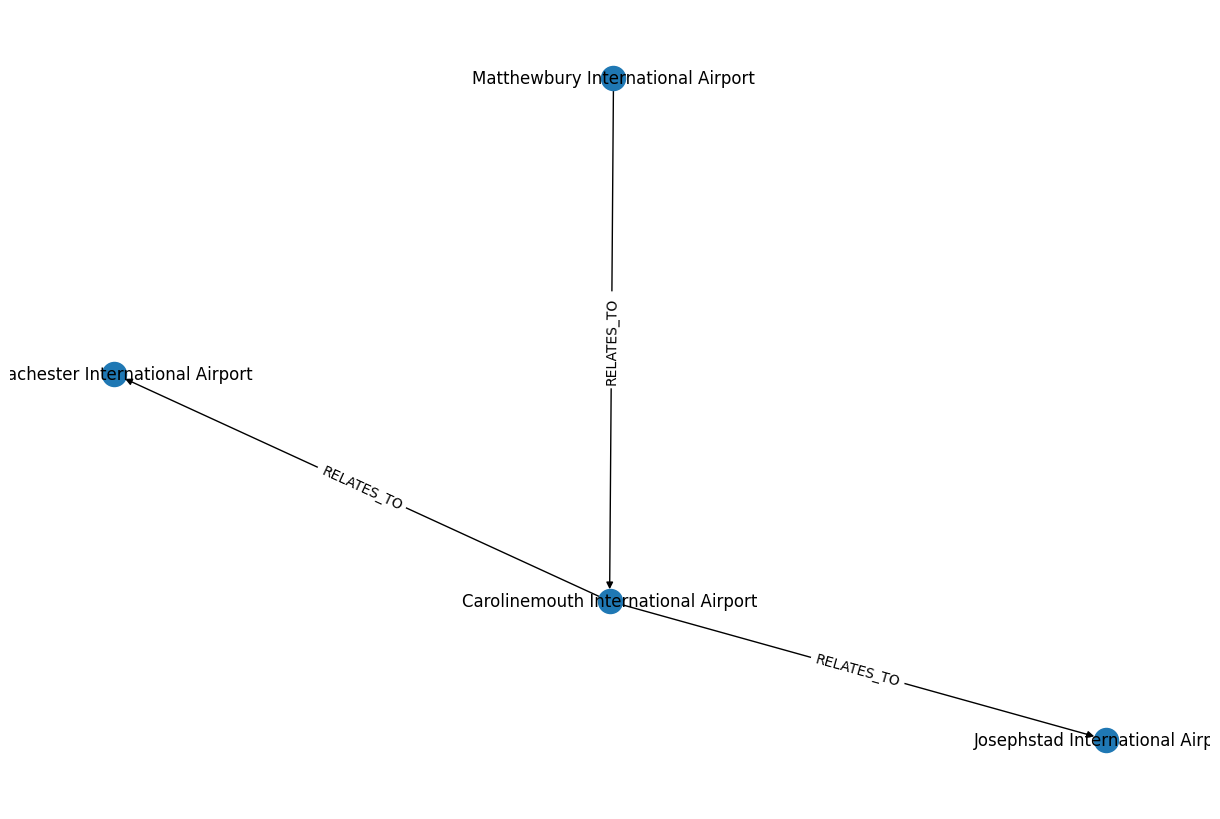

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# ⭐查询数据, 这里换成你的 query ⭐
data = run_query("MATCH (n)-[r]->(m) RETURN n, r, m LIMIT 3")

# 创建一个空的有向图
G = nx.DiGraph()

# 处理每一条关系
for record in data:
    n = record['n']
    m = record['m']
    r = record['r']

    # 从字典里取属性，比如 name，如果没有 name 就用内部 neo4j id
    n_id = n.get('name', str(n))
    m_id = m.get('name', str(m))

    # 取关系的类型
    relation_type = r.get('type', 'RELATES_TO') if isinstance(r, dict) else 'RELATES_TO'

    # 加节点和边
    G.add_node(n_id)
    G.add_node(m_id)
    G.add_edge(n_id, m_id, label=relation_type)

# 画图
pos = nx.spring_layout(G)  # 自动排版
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, arrows=True)

# 画边上的标签（关系名）
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

### Section 3 - Display 2


In [ ]:
pip install pyvis

In [4]:
from pyvis.network import Network

# 创建 pyvis 的 Network
net = Network(notebook=True, directed=True)

# ⭐查询数据, 这里换成你的 query ⭐
data = run_query("MATCH (n)-[r]->(m) RETURN n, r, m LIMIT 3")

# 加入节点和边
for record in data:
    n = record['n']
    m = record['m']
    r = record['r']

    # 从字典中取 name，如果没有就用str(n)做id
    n_id = n.get('name', str(n))
    m_id = m.get('name', str(m))

    # 给节点加label（可选）
    n_label = ", ".join(n.keys()) if n else "Node"
    m_label = ", ".join(m.keys()) if m else "Node"

    # 添加节点（避免重复）
    net.add_node(n_id, label=n_id, title=str(n))
    net.add_node(m_id, label=m_id, title=str(m))

    # 取关系类型
    relation_type = r.get('type', 'RELATES_TO') if isinstance(r, dict) else 'RELATES_TO'

    # 添加边
    net.add_edge(n_id, m_id, label=relation_type)

# 在Jupyter Notebook里显示
net.show("graph.html")

graph.html
